# Simple Linear Regression Problem. Perceptron

Let's consider the most simple problem ever, **univariate linear regression**. We'll model a single dependent variable as a linear combination (a straight line) of an independent variable. This problem can be solved with a Perceptron with a linear activation function.

![image](./img/perceptron_diagram.png)

**Original paper**
https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf

**MLP Boundaries**
https://medium.com/@amanatulla1606/unraveling-the-magic-how-multilayer-perceptron-captures-non-linearity-in-data-6a4d385f7592

**Perceptron**
https://irondog421.github.io/ann/2024/10/27/perceptron-artificial-neuron-linear-classifier-copy.html

## 0. Let's define our problem

In [42]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # This disables GPU

print(tf.__version__)

tf.random.set_seed(42)
keras.utils.set_random_seed(42)
np.random.seed(42)

2.17.0


In our case it's easy to predict the output of any new incoming value, we only have to sum 10 to the input, more formally $y = x + 10$. This is a regression problem where our objective is to learn a continuous mapping from the input variable $x$ to the output variable $y$. Specifically, using linear regression, we can model the relationship by estimating the slope and intercept such that the prediction $\hat{y}$ closely matches the true $y$ values. Once the model is trained, it will correctly perform the operation $\hat{y} = x + 10$ for any new unseen $x$.

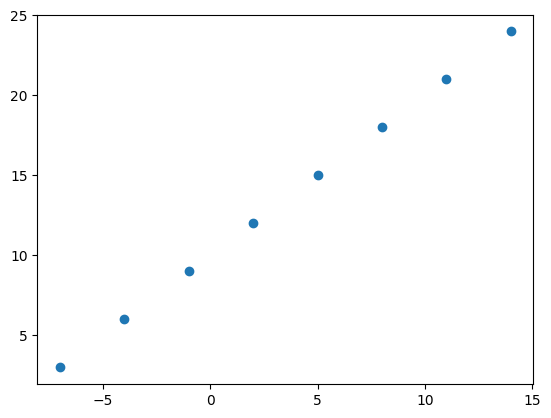

In [82]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) #independent variables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) #dependent variables, output, labels

plt.scatter(X,y)


As we can see the dependent variables can be obtained with an easy sum

In [44]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## 1. Input and output shapes

Let's see an example of another regression problem. Imagine predicting the sale price of a house based on factors as the number of bedrooms, bathrooms and garages. Our input shape would be 3 because we have to specify 3 values within our array, the output shape would be a single valued array.

In [45]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

So in our problem both, input and output shapes are (1,)

## 2. Simple Modeling with TF

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.  
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).  
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

MAE: $\frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$

In [ ]:
# 1. Create a model using the Sequential API
simple_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,)
)])

# 2. Compile the model with the learning rate schedule
simple_model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.SGD())

# Reshape X to be a 2D tensor with shape (batch_size, 1)
X_reshaped = tf.reshape(X, (-1, 1)) #Convert it to an (8,1) shaped vector, 8 samples with 1 feature per sample

# 3. Fit the model using the reshaped X
simple_model.fit(X_reshaped, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 13.4964
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13.3639
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.2314
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.0989
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.9664


In [19]:
y_pred = simple_model.predict(np.array([[17.0]])) #27
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[19.384203]], dtype=float32)

### 2.1 Improve the model

- **Improve the architecture (more layers, neurons, activation func...)**
- **Change the optimizer at compiling time (also change the learning rate)**
- **Leave the training to last longer**

In [88]:
# 1. Create a model using the Sequential API
improved_model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1,)),
    keras.layers.Dense(1)
])

# 2. Compile the model
improved_model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.Adam(learning_rate=0.001))

# Reshape X to be a 2D tensor with shape (batch_size, 1)
X_reshaped = tf.reshape(X, (-1, 1))

# 3. Fit the model using the reshaped X
improved_model.fit(X,y, epochs=500)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 12.8029
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.7057
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.6084
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.5112
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.4140
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.3167
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.2194
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.1221
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.0247
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9273
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.8298
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7322
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.6345
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.5368
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.4389
Epo

In [89]:
y_pred = improved_model.predict(np.array([[17.0]])) #27
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[27.07393]], dtype=float32)

## 3. Assess the model performance

In this cell, we will split our dataset into training, validation, and test sets. This is a common practice in machine learning to ensure that our model generalizes well to unseen data. 

Here's the plan:

1. **Split the data into training and test sets**: We will first split the data into 80% training and 20% test sets.
2. **Further split the test set into validation and test sets**: We will then split the temporary set (20% of the original data) into 50% validation and 50% test sets.

The final split will be:
- 80% training set
- 20% validation set

We will not use test set!

In [90]:
X = tf.range(-100, 100, 4) #independent variable
y = X + 10 #dependent variable

print(X)
print(y)

tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96], shape=(50,), dtype=int32)
tf.Tensor(
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106], shape=(50,), dtype=int32)


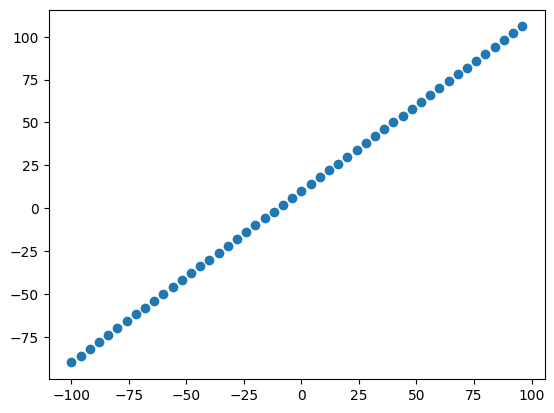

In [91]:
plt.scatter(X,y)

In [92]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [93]:
improved_model.fit(X,y, epochs=500, validation_data=(X_test,y_test))


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.5855 - val_loss: 2.9370
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.5243 - val_loss: 4.4128
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0671 - val_loss: 5.0953
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9164 - val_loss: 1.8611
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4460 - val_loss: 3.2896
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8598 - val_loss: 1.9626
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4397 - val_loss: 2.6822
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4694 - val_loss: 2.3804
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7113 - val_loss: 3.3374
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9290 - val_loss: 1.0169
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8109 - val_loss: 1.6972
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8870 - val_lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


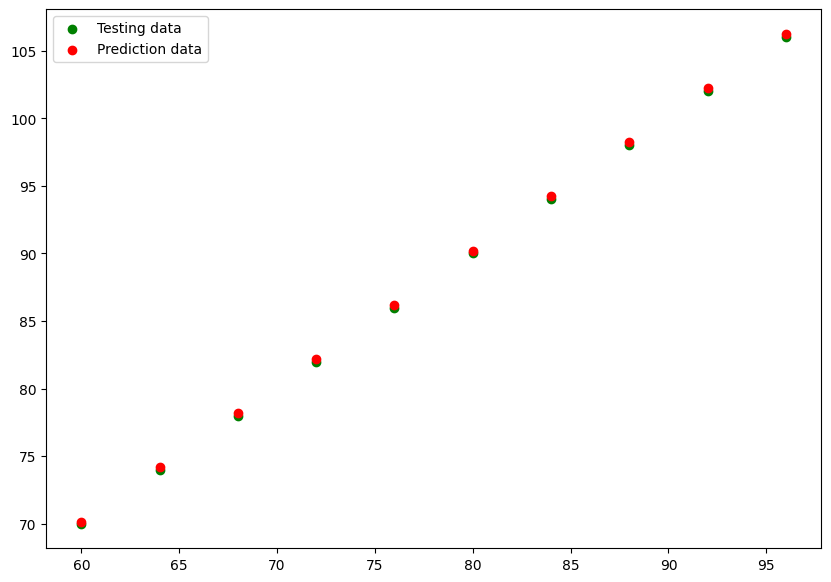

In [94]:
y_preds = improved_model.predict(X_test)

plt.figure(figsize=(10, 7))

# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Plot training data in red
plt.scatter(X_test, y_preds, c='r', label='Prediction data')
# Show the legend
plt.legend();

## Advanced questions

- **Why the initial model that represents a single Perceptron and it's theoritcally suitable for fitting our data does not get good results?**
- **Try to modify it keeping the Perceptron essence (same layer architecture) to improve the model accuracy on the training data**

I would personally read your responses, you can contact me through my LinkedIn https://es.linkedin.com/in/carlos-ruiz-aguirre-55a70323b